<a href="https://colab.research.google.com/github/taqiyaehsan/cs112/blob/main/CvxOptim_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 9.30

#### a

Experiment 1

In [3]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.01
BETA = 0.5

In [4]:
# Gradient Descent
# For plotting
obj_values_gd = []
step_lengths_gd = []

# gradient descent with backtracking
for iteration in range(MAXITERS):
    val = -np.sum(np.log(1 - A @ x_gd)) - np.sum(np.log(1 + x_gd)) - np.sum(np.log(1 - x_gd))
    grad = A.T @ (1 / (1 - A @ x_gd)) - 1 / (1 + x_gd) + 1 / (1 - x_gd)

    if np.linalg.norm(grad) < GRADTOL:
        break

    v = -grad
    fprime = grad.T @ v

    # backtracking
    t = 1

    while np.max(A @ (x_gd + t * v)) >= 1 or np.max(np.abs(x_gd + t * v)) >= 1:
        t = BETA * t

    while -np.sum(np.log(1 - A @ (x_gd + t * v))) - np.sum(np.log(1 - (x_gd + t * v)**2)) > val + ALPHA * t * grad.T @ v:
        t = BETA * t

    x_gd = x_gd + t * v

    # Save values for plotting
    obj_values_gd.append(val)
    step_lengths_gd.append(t)

# Display the result
print(f"Optimal x: {x_gd.T}, {x_gd.shape}" )

Optimal x: [ 0.08063253  0.39652608 -0.13025051  0.28693996 -0.05597952  0.21131125
 -0.13692623  0.57726897 -0.30400251 -0.76010012  0.22144551 -0.62418343
 -0.30053777  0.58616002 -0.20408408 -0.69469668 -0.55524346 -0.25903599
  0.26913821 -0.25000272 -0.26340978 -0.21470707 -0.35196078 -0.72673435
 -0.14501313 -0.22785098  0.57419025 -0.37501841  0.1151051   0.70749453
  0.467217    0.46617752 -0.61359255  0.72501579  0.16946618  0.05728826
 -0.75852519  0.01841183  0.41873658 -0.02849443  0.53235084 -0.14528923
  0.42980824  0.02358321 -0.57452381 -0.37262421  0.33812182 -0.06368942
 -0.14188686  0.15263664 -0.01641914 -0.4115382  -0.17591981  0.29887837
  0.58690755  0.33540985 -0.15135494 -0.09171348 -0.08702178 -0.86669678
 -0.27346954 -0.81858508  0.84879133  0.61648853 -0.66437844 -0.67023128
 -0.52932447 -0.04978034 -0.02842849 -0.37813494  0.23941855 -0.19618965
  0.82349572  0.12608069 -0.01846307  0.51725067  0.25568157 -0.31091616
  0.32533744  0.33093252 -0.14928025 -0.

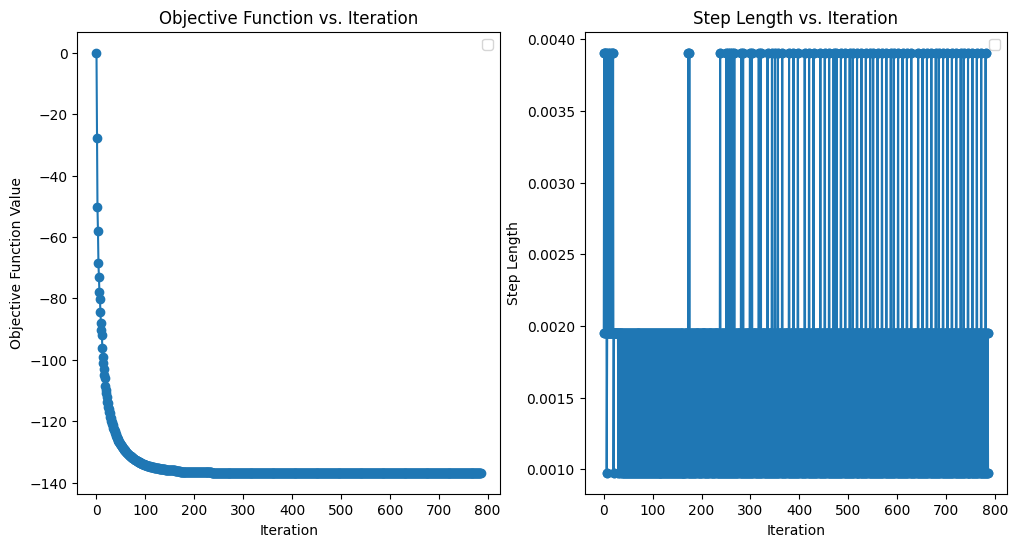

In [5]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_gd)
plt.scatter(range(len(obj_values_gd)), obj_values_gd, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_gd, marker='o')
plt.scatter(range(len(step_lengths_gd)), step_lengths_gd, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show();

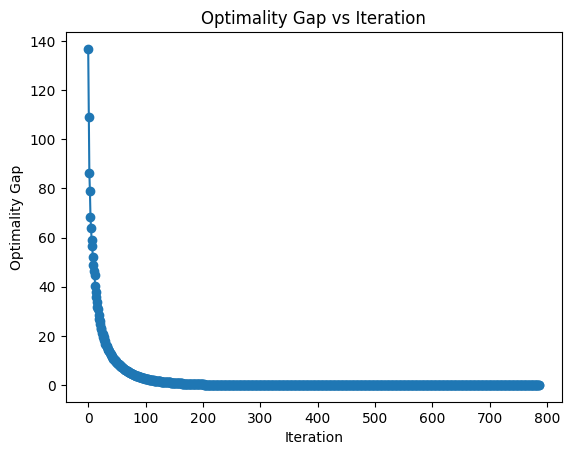

In [7]:
# Gap to Optimality
p_star_gd = np.min(np.array(obj_values_gd))
optimality_gaps = np.abs(obj_values_gd - p_star_gd)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

Experiment 2

In [8]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.5
BETA = 0.1

In [9]:
# Gradient Descent
# For plotting
obj_values_gd = []
step_lengths_gd = []

# gradient descent with backtracking
for iteration in range(MAXITERS):
    val = -np.sum(np.log(1 - A @ x_gd)) - np.sum(np.log(1 + x_gd)) - np.sum(np.log(1 - x_gd))
    grad = A.T @ (1 / (1 - A @ x_gd)) - 1 / (1 + x_gd) + 1 / (1 - x_gd)

    if np.linalg.norm(grad) < GRADTOL:
        break

    v = -grad
    fprime = grad.T @ v

    # backtracking
    t = 1

    while np.max(A @ (x_gd + t * v)) >= 1 or np.max(np.abs(x_gd + t * v)) >= 1:
        t = BETA * t

    while -np.sum(np.log(1 - A @ (x_gd + t * v))) - np.sum(np.log(1 - (x_gd + t * v)**2)) > val + ALPHA * t * grad.T @ v:
        t = BETA * t

    x_gd = x_gd + t * v

    # Save values for plotting
    obj_values_gd.append(val)
    step_lengths_gd.append(t)

# Display the result
print(f"Optimal x: {x_gd.T}, {x_gd.shape}" )

Optimal x: [ 0.08063589  0.39652358 -0.13024921  0.2869436  -0.05598089  0.2113102
 -0.13692894  0.57726872 -0.30400308 -0.76010015  0.22144512 -0.62418173
 -0.30053979  0.58615787 -0.2040848  -0.69469408 -0.55523874 -0.2590333
  0.26913582 -0.25000485 -0.26340959 -0.21470252 -0.35195915 -0.72673309
 -0.14501346 -0.22784889  0.57418866 -0.37501654  0.11510139  0.70749468
  0.46721493  0.46617537 -0.61359027  0.72501298  0.16946392  0.05728879
 -0.75852566  0.01841403  0.41873409 -0.02849082  0.53234939 -0.14528862
  0.42980814  0.02358474 -0.57452172 -0.37261938  0.33812012 -0.06369182
 -0.14188497  0.15263511 -0.01642036 -0.41153502 -0.17591906  0.29887766
  0.5869068   0.33540502 -0.15135047 -0.0917158  -0.0870212  -0.86669714
 -0.27346896 -0.81858533  0.84879072  0.61648695 -0.66437765 -0.67023196
 -0.52932311 -0.04977807 -0.02842649 -0.37813141  0.2394172  -0.1961905
  0.82349509  0.12607991 -0.01846276  0.51725022  0.25568567 -0.31091307
  0.32533249  0.33093211 -0.14928047 -0.229

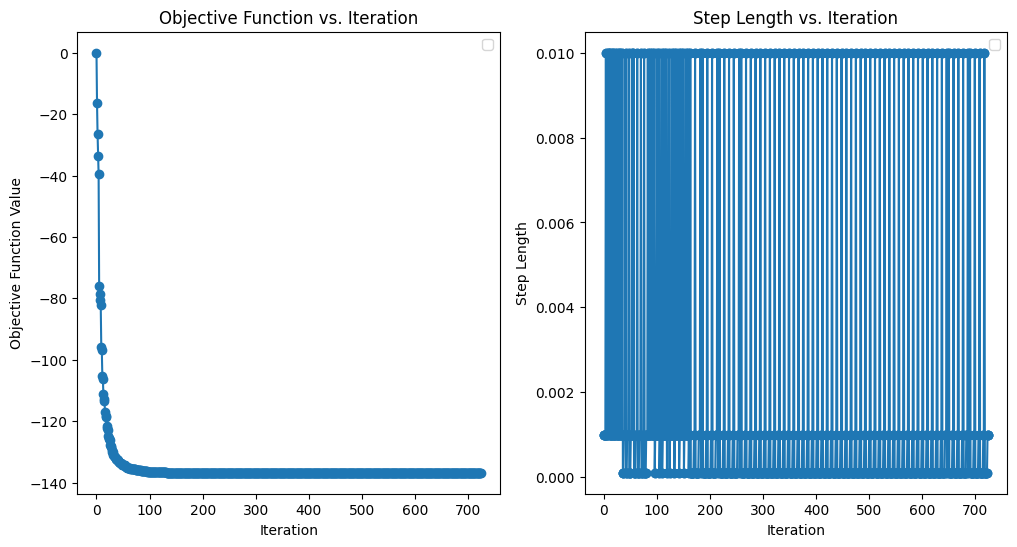

In [10]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_gd)
plt.scatter(range(len(obj_values_gd)), obj_values_gd, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_gd, marker='o')
plt.scatter(range(len(step_lengths_gd)), step_lengths_gd, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show();

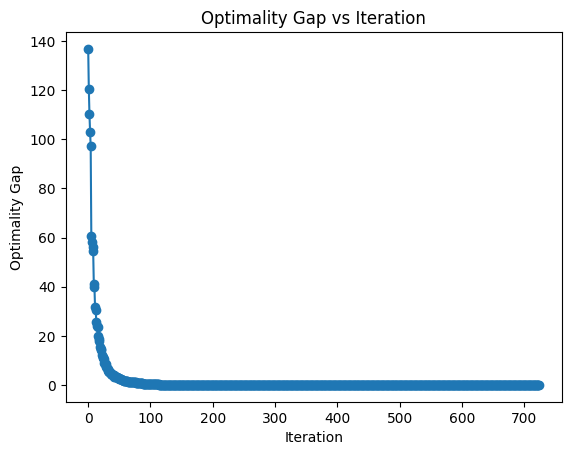

In [12]:
# Gap to Optimality
p_star_gd = np.min(np.array(obj_values_gd))
optimality_gaps = np.abs(obj_values_gd - p_star_gd)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

Experiment 3:

In [15]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.2
BETA = 0.005

In [16]:
# Gradient Descent
# For plotting
obj_values_gd = []
step_lengths_gd = []

# gradient descent with backtracking
for iteration in range(MAXITERS):
    val = -np.sum(np.log(1 - A @ x_gd)) - np.sum(np.log(1 + x_gd)) - np.sum(np.log(1 - x_gd))
    grad = A.T @ (1 / (1 - A @ x_gd)) - 1 / (1 + x_gd) + 1 / (1 - x_gd)

    if np.linalg.norm(grad) < GRADTOL:
        break

    v = -grad
    fprime = grad.T @ v

    # backtracking
    t = 1

    while np.max(A @ (x_gd + t * v)) >= 1 or np.max(np.abs(x_gd + t * v)) >= 1:
        t = BETA * t

    while -np.sum(np.log(1 - A @ (x_gd + t * v))) - np.sum(np.log(1 - (x_gd + t * v)**2)) > val + ALPHA * t * grad.T @ v:
        t = BETA * t

    x_gd = x_gd + t * v

    # Save values for plotting
    obj_values_gd.append(val)
    step_lengths_gd.append(t)

# Display the result
print(f"Optimal x: {x_gd.T}, {x_gd.shape}" )

Optimal x: [ 0.04819628  0.21535945 -0.09223125  0.15478864 -0.03553023  0.19953965
 -0.03155195  0.3008882  -0.2551667  -0.57837579  0.18083357 -0.41173068
 -0.21659312  0.38439611 -0.18647462 -0.4093414  -0.40238426 -0.14540509
  0.12679873 -0.16069197 -0.30102964 -0.12178688 -0.25814521 -0.49168172
 -0.13625296 -0.0870146   0.36197058 -0.2091488   0.01093992  0.52020944
  0.19402678  0.2835365  -0.38678701  0.41066347  0.13032321  0.01436412
 -0.53812327  0.10437275  0.22204789  0.03030077  0.36004447 -0.05888389
  0.28604611  0.08802588 -0.35502516 -0.15388695  0.1960019  -0.02780908
 -0.11699136  0.12048157 -0.03513313 -0.26566778 -0.03030291  0.19541637
  0.44842407  0.14306933 -0.01237826 -0.15590019 -0.04299622 -0.6754883
 -0.2497103  -0.62000228  0.75308694  0.37194941 -0.42076328 -0.51323965
 -0.39575947 -0.07709301  0.00975217 -0.29308347  0.19835531 -0.17783218
  0.64358182  0.05156139  0.02094276  0.37396193  0.11681803 -0.13299976
  0.12994989  0.19283387 -0.14466861 -0.1

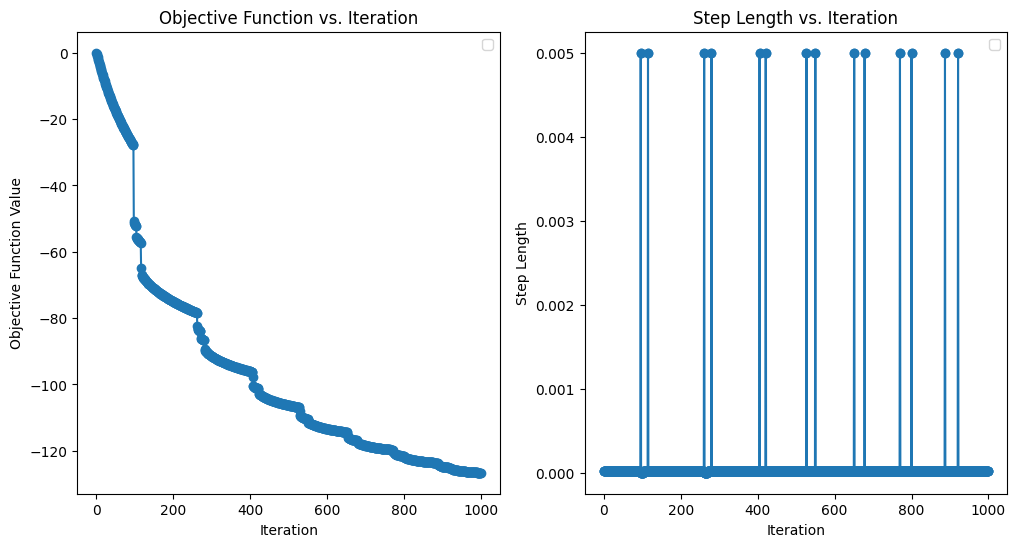

In [17]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_gd)
plt.scatter(range(len(obj_values_gd)), obj_values_gd, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_gd, marker='o')
plt.scatter(range(len(step_lengths_gd)), step_lengths_gd, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show();

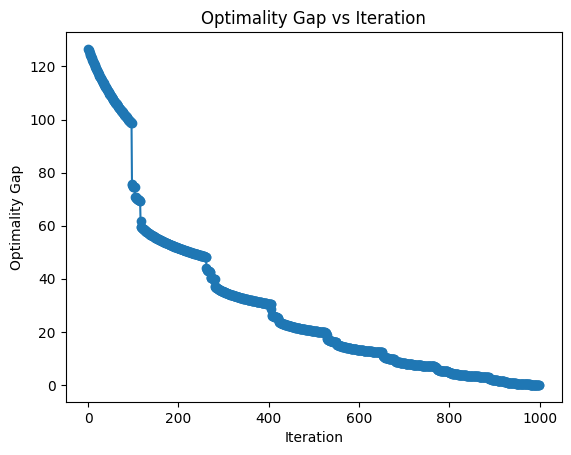

In [18]:
# Gap to Optimality
p_star_gd = np.min(np.array(obj_values_gd))
optimality_gaps = np.abs(obj_values_gd - p_star_gd)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

#### b

Experiment 1

In [19]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.01
BETA = 0.5

In [20]:
# Newton's Method
x_nt = np.zeros(n)

# For plotting
obj_values_newton = []
step_lengths_newton = []

for iteration in range(MAXITERS):
  val = -np.sum(np.log(1 - A @ x_nt)) - np.sum(np.log(1 + x_nt)) - np.sum(np.log(1 - x_nt))

  d = 1 / (1 - A @ x_nt)
  grad = A.T @ d - 1 / (1 + x_nt) + 1 / (1 - x_nt)
  hess = A.T @ np.diag(d**2) @ A + np.diag((1 / (1 + x_nt)**2) + (1 / (1 - x_nt)**2))

  # v = -solve(hess, grad)
  v = -np.linalg.solve(hess, grad)
  fprime = grad.T @ v

  if abs(fprime) < NTTOL:
    break

  # backtracking
  t = 1
  while np.max(A @ (x_nt + t * v)) >= 1 or np.max(np.abs(x_nt + t * v)) >= 1:
    t = BETA * t

  while -np.sum(np.log(1 - A @ (x_nt + t * v))) - np.sum(np.log(1 - (x_nt + t * v)**2)) > val + ALPHA * t * fprime:
    t = BETA * t

  x_nt = x_nt + t * v

  # Save values for plotting
  obj_values_newton.append(val)
  step_lengths_newton.append(t)

print(f"Optimal x (Newton's Method): {x_nt.T}, {x_nt.shape}")

Optimal x (Newton's Method): [ 0.08061776  0.39653907 -0.13025638  0.28692335 -0.05597619  0.21131819
 -0.13691465  0.57727082 -0.30400217 -0.76009921  0.22144687 -0.62419276
 -0.30052766  0.58617093 -0.20408197 -0.69470883 -0.55526573 -0.25904795
  0.26914946 -0.24999337 -0.26341172 -0.21472735 -0.3519683  -0.72673966
 -0.14500872 -0.22786081  0.57419785 -0.37502869  0.11512372  0.70749487
  0.46722713  0.46618855 -0.61360342  0.72502894  0.16947659  0.05728706
 -0.75852285  0.01840015  0.41874905 -0.02851081  0.53235793 -0.14529098
  0.42980881  0.02357726 -0.57453303 -0.37264704  0.33813064 -0.06367687
 -0.14189591  0.15264574 -0.01641339 -0.41155378 -0.17592354  0.29888068
  0.58691058  0.33543374 -0.15137632 -0.09170352 -0.08702432 -0.86669536
 -0.2734729  -0.81858435  0.84879436  0.61649503 -0.66438135 -0.6702271
 -0.52933223 -0.0497937  -0.02843713 -0.37815318  0.23942621 -0.19618326
  0.82349862  0.12608389 -0.01846235  0.51725374  0.25566053 -0.31093054
  0.32536097  0.3309339

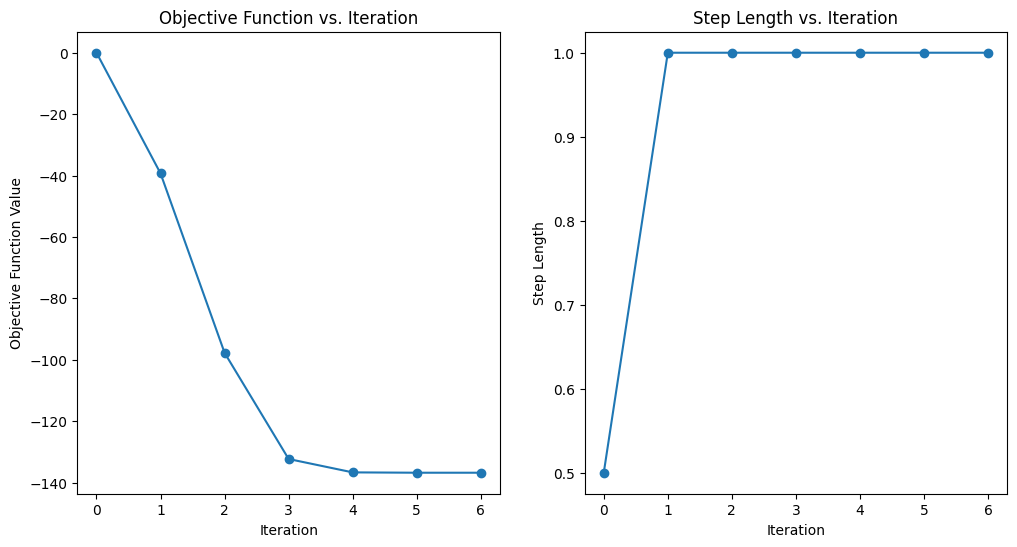

In [21]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_newton)
plt.scatter(range(len(obj_values_newton)), obj_values_newton, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_newton)
plt.scatter(range(len(step_lengths_newton)), step_lengths_newton, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

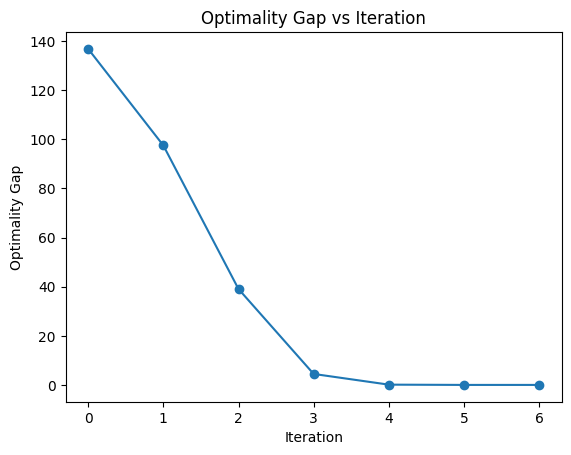

In [22]:
# Gap to Optimality
p_star_nt = np.min(np.array(obj_values_newton))
optimality_gaps = np.abs(obj_values_newton - p_star_nt)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

Experiment 2

In [27]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.2
BETA = 0.005

In [28]:
# Newton's Method
x_nt = np.zeros(n)

# For plotting
obj_values_newton = []
step_lengths_newton = []

for iteration in range(MAXITERS):
  val = -np.sum(np.log(1 - A @ x_nt)) - np.sum(np.log(1 + x_nt)) - np.sum(np.log(1 - x_nt))

  d = 1 / (1 - A @ x_nt)
  grad = A.T @ d - 1 / (1 + x_nt) + 1 / (1 - x_nt)
  hess = A.T @ np.diag(d**2) @ A + np.diag((1 / (1 + x_nt)**2) + (1 / (1 - x_nt)**2))

  # v = -solve(hess, grad)
  v = -np.linalg.solve(hess, grad)
  fprime = grad.T @ v

  if abs(fprime) < NTTOL:
    break

  # backtracking
  t = 1
  while np.max(A @ (x_nt + t * v)) >= 1 or np.max(np.abs(x_nt + t * v)) >= 1:
    t = BETA * t

  while -np.sum(np.log(1 - A @ (x_nt + t * v))) - np.sum(np.log(1 - (x_nt + t * v)**2)) > val + ALPHA * t * fprime:
    t = BETA * t

  x_nt = x_nt + t * v

  # Save values for plotting
  obj_values_newton.append(val)
  step_lengths_newton.append(t)

print(f"Optimal x (Newton's Method): {x_nt.T}, {x_nt.shape}")

Optimal x (Newton's Method): [ 0.08061778  0.39653909 -0.13025634  0.28692336 -0.05597617  0.2113182
 -0.13691461  0.5772708  -0.30400218 -0.7600992   0.22144683 -0.62419279
 -0.30052762  0.58617089 -0.20408208 -0.69470888 -0.55526574 -0.25904792
  0.2691495  -0.24999339 -0.2634117  -0.21472737 -0.35196832 -0.72673968
 -0.14500871 -0.22786085  0.57419789 -0.37502866  0.11512371  0.70749488
  0.46722708  0.46618853 -0.6136034   0.72502895  0.16947658  0.05728706
 -0.75852285  0.01840011  0.41874906 -0.02851081  0.53235792 -0.14529099
  0.42980881  0.02357727 -0.57453304 -0.372647    0.33813065 -0.06367689
 -0.14189591  0.1526457  -0.01641339 -0.4115538  -0.1759235   0.29888064
  0.58691059  0.33543371 -0.15137629 -0.09170352 -0.08702424 -0.86669533
 -0.27347296 -0.81858433  0.84879437  0.616495   -0.66438134 -0.67022712
 -0.52933225 -0.04979378 -0.02843707 -0.37815316  0.2394262  -0.19618333
  0.82349863  0.12608389 -0.01846234  0.51725377  0.25566054 -0.31093051
  0.32536097  0.3309339

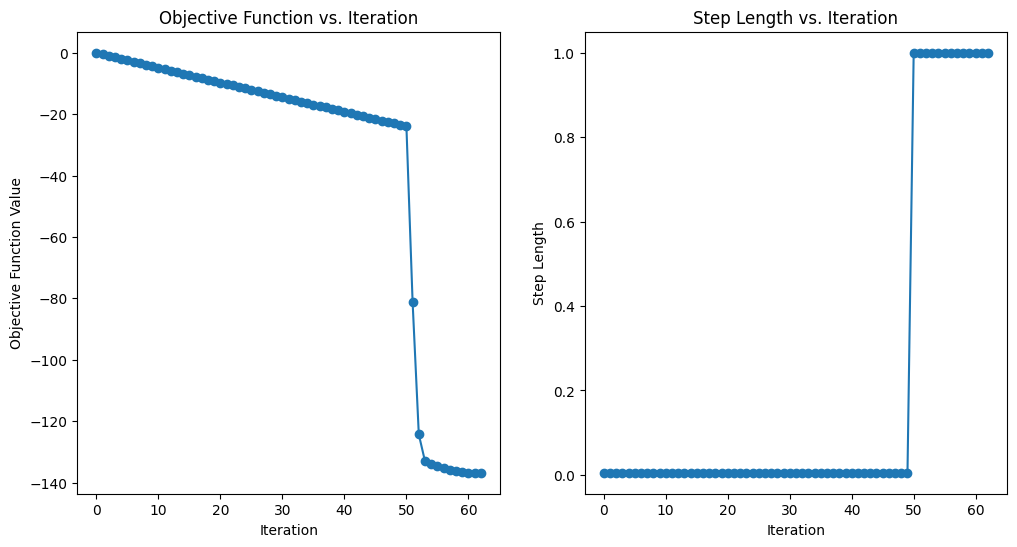

In [29]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_newton)
plt.scatter(range(len(obj_values_newton)), obj_values_newton, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_newton)
plt.scatter(range(len(step_lengths_newton)), step_lengths_newton, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

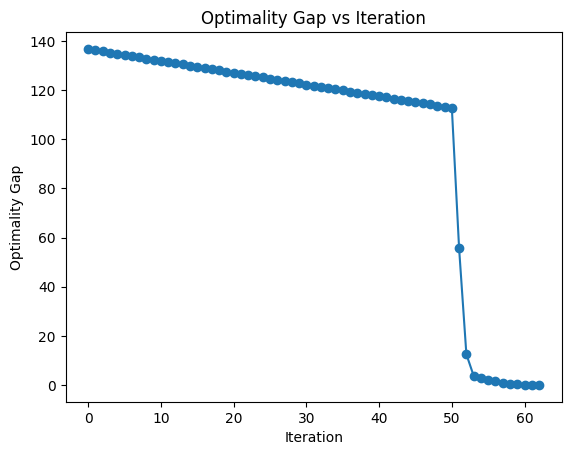

In [30]:
# Gap to Optimality
p_star_nt = np.min(np.array(obj_values_newton))
optimality_gaps = np.abs(obj_values_newton - p_star_nt)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

Experiment 3

In [31]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.01
BETA = 0.5

In [32]:
# Newton's Method
x_nt = np.zeros(n)

# For plotting
obj_values_newton = []
step_lengths_newton = []

for iteration in range(MAXITERS):
  val = -np.sum(np.log(1 - A @ x_nt)) - np.sum(np.log(1 + x_nt)) - np.sum(np.log(1 - x_nt))

  d = 1 / (1 - A @ x_nt)
  grad = A.T @ d - 1 / (1 + x_nt) + 1 / (1 - x_nt)
  hess = A.T @ np.diag(d**2) @ A + np.diag((1 / (1 + x_nt)**2) + (1 / (1 - x_nt)**2))

  # v = -solve(hess, grad)
  v = -np.linalg.solve(hess, grad)
  fprime = grad.T @ v

  if abs(fprime) < NTTOL:
    break

  # backtracking
  t = 1
  while np.max(A @ (x_nt + t * v)) >= 1 or np.max(np.abs(x_nt + t * v)) >= 1:
    t = BETA * t

  while -np.sum(np.log(1 - A @ (x_nt + t * v))) - np.sum(np.log(1 - (x_nt + t * v)**2)) > val + ALPHA * t * fprime:
    t = BETA * t

  x_nt = x_nt + t * v

  # Save values for plotting
  obj_values_newton.append(val)
  step_lengths_newton.append(t)

print(f"Optimal x (Newton's Method): {x_nt.T}, {x_nt.shape}")

Optimal x (Newton's Method): [ 0.08061776  0.39653907 -0.13025638  0.28692335 -0.05597619  0.21131819
 -0.13691465  0.57727082 -0.30400217 -0.76009921  0.22144687 -0.62419276
 -0.30052766  0.58617093 -0.20408197 -0.69470883 -0.55526573 -0.25904795
  0.26914946 -0.24999337 -0.26341172 -0.21472735 -0.3519683  -0.72673966
 -0.14500872 -0.22786081  0.57419785 -0.37502869  0.11512372  0.70749487
  0.46722713  0.46618855 -0.61360342  0.72502894  0.16947659  0.05728706
 -0.75852285  0.01840015  0.41874905 -0.02851081  0.53235793 -0.14529098
  0.42980881  0.02357726 -0.57453303 -0.37264704  0.33813064 -0.06367687
 -0.14189591  0.15264574 -0.01641339 -0.41155378 -0.17592354  0.29888068
  0.58691058  0.33543374 -0.15137632 -0.09170352 -0.08702432 -0.86669536
 -0.2734729  -0.81858435  0.84879436  0.61649503 -0.66438135 -0.6702271
 -0.52933223 -0.0497937  -0.02843713 -0.37815318  0.23942621 -0.19618326
  0.82349862  0.12608389 -0.01846235  0.51725374  0.25566053 -0.31093054
  0.32536097  0.3309339

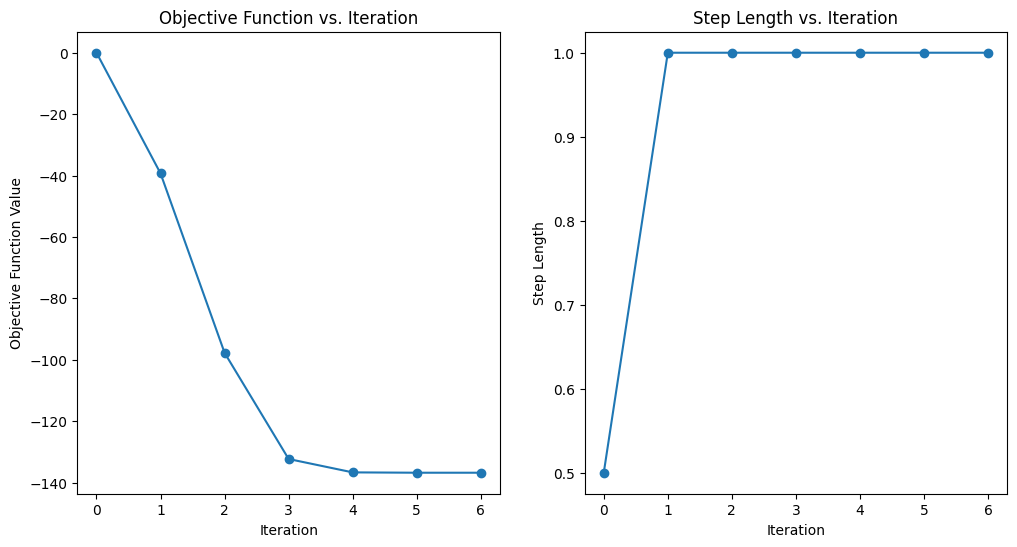

In [33]:
# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(obj_values_newton)
plt.scatter(range(len(obj_values_newton)), obj_values_newton, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(step_lengths_newton)
plt.scatter(range(len(step_lengths_newton)), step_lengths_newton, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

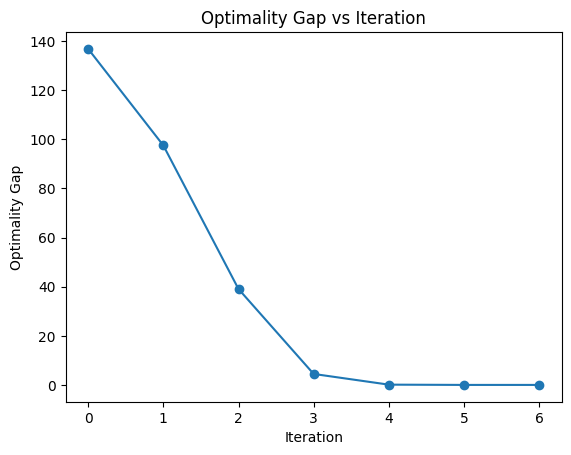

In [34]:
# Gap to Optimality
p_star_nt = np.min(np.array(obj_values_newton))
optimality_gaps = np.abs(obj_values_newton - p_star_nt)

plt.plot(optimality_gaps)
plt.scatter(range(len(optimality_gaps)), optimality_gaps, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')

plt.show()

### Problem 9.31

#### a

In [41]:
def reusing_hessian_newton_method(A, max_iters=MAXITERS, alpha=ALPHA, beta=BETA, nttol=NTTOL, reuse_interval=10):
    m, n = A.shape
    x = np.zeros(n)

    obj_values = []
    step_lengths = []

    hess_inv = np.eye(n)
    iters = 1

    for iteration in range(1, max_iters + 1):
        val = -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 + x)) - np.sum(np.log(1 - x))
        grad = A.T @ (1 / (1 - A @ x)) - 1 / (1 + x) + 1 / (1 - x)

        if np.linalg.norm(grad) < nttol:
            break

        if iteration % reuse_interval == 0:
            hess = A.T @ np.diag((1 / (1 - A @ x))**2) @ A + np.diag(1 / (1 + x)**2 + 1 / (1 - x)**2)
            hess_inv = np.linalg.inv(hess)

        v = -hess_inv @ grad
        fprime = grad.T @ v

        # backtracking
        t = 1

        while np.max(A @ (x + t * v)) >= 1 or np.max(np.abs(x + t * v)) >= 1:
          t = BETA * t

        while -np.sum(np.log(1 - A @ (x + t * v))) - np.sum(np.log(1 - (x + t * v)**2)) > val + ALPHA * t * fprime:
          t = BETA * t

        x = x + t * v

        # Save values for plotting
        obj_values.append(val)
        step_lengths.append(t)
        iters += 1

    return x, obj_values, step_lengths, iters

Experiment 1

In [42]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.01
BETA = 0.5

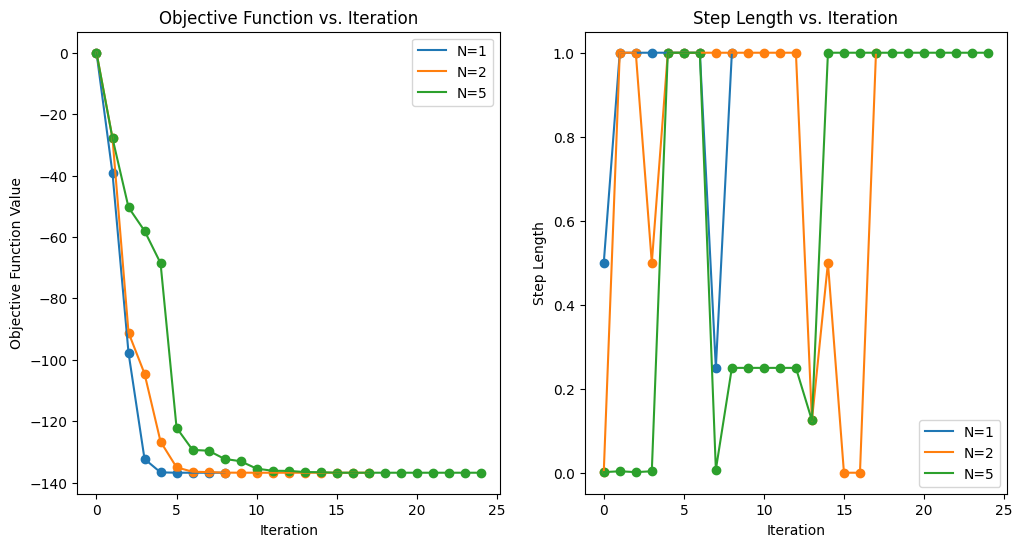

In [43]:
# np.random.seed(42)
# A = np.random.randn(m, n)

# Test Newton's method with different values of N
N_values = [1, 2, 5]
results = []

for N in N_values:
    solution, obj_values, step_lengths, iterations = reusing_hessian_newton_method(A, reuse_interval=N)
    results.append((solution, obj_values, step_lengths, iterations))

# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
for i, (solution, obj_values, _, iters) in enumerate(results):
    plt.plot(obj_values, label=f"N={N_values[i]}")
    plt.scatter(range(len(obj_values)), obj_values, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
for i, (_, _, step_lengths, iters) in enumerate(results):
    plt.plot(step_lengths, label=f"N={N_values[i]}")
    plt.scatter(range(len(step_lengths)), step_lengths, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show()

Experiment 2

In [44]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.5
BETA = 0.1

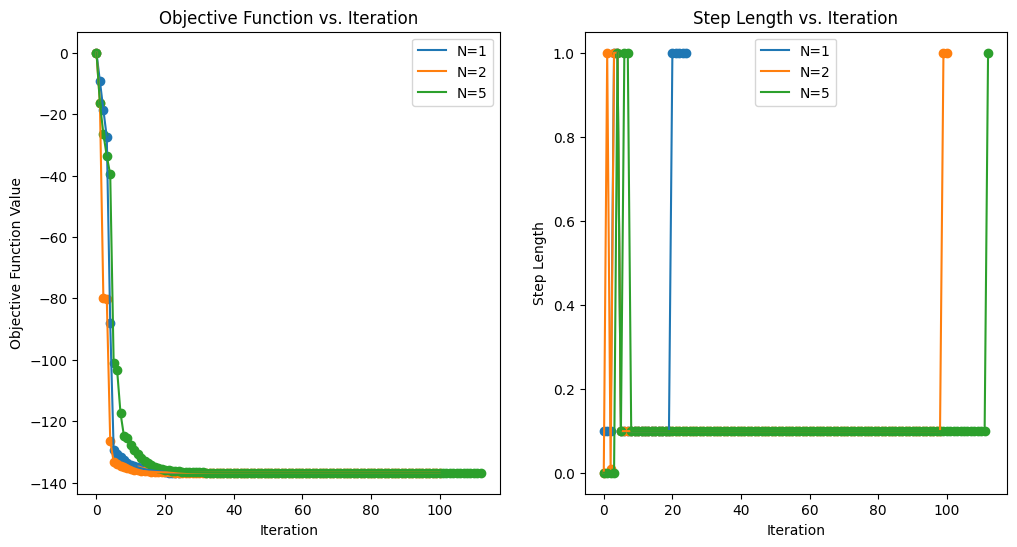

In [45]:
# np.random.seed(42)
# A = np.random.randn(m, n)

# Test Newton's method with different values of N
N_values = [1, 2, 5]
results = []

for N in N_values:
    solution, obj_values, step_lengths, iterations = reusing_hessian_newton_method(A, reuse_interval=N)
    results.append((solution, obj_values, step_lengths, iterations))

# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
for i, (solution, obj_values, _, iters) in enumerate(results):
    plt.plot(obj_values, label=f"N={N_values[i]}")
    plt.scatter(range(len(obj_values)), obj_values, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
for i, (_, _, step_lengths, iters) in enumerate(results):
    plt.plot(step_lengths, label=f"N={N_values[i]}")
    plt.scatter(range(len(step_lengths)), step_lengths, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show()

Experiment 3

In [46]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.2
BETA = 0.05

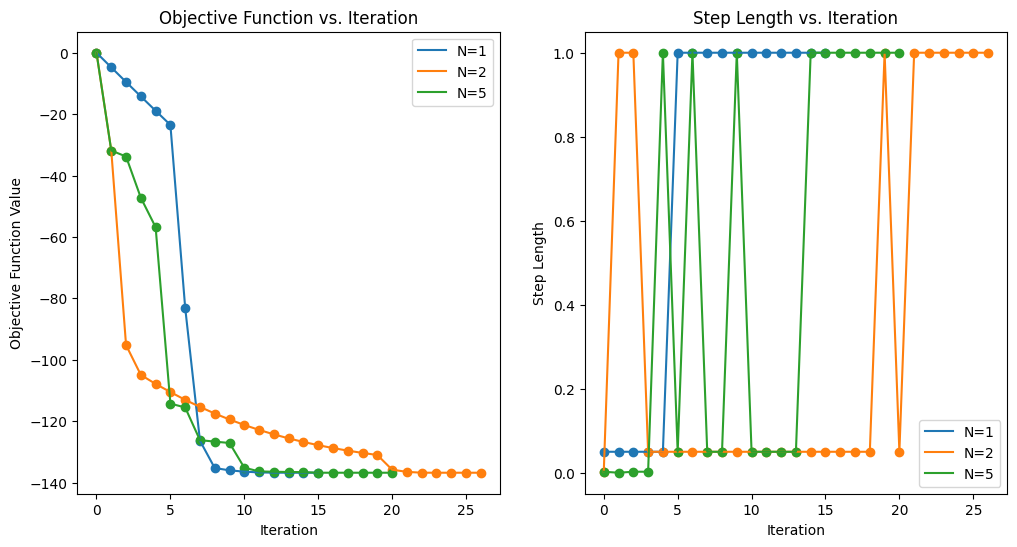

In [47]:
# np.random.seed(42)
# A = np.random.randn(m, n)

# Test Newton's method with different values of N
N_values = [1, 2, 5]
results = []

for N in N_values:
    solution, obj_values, step_lengths, iterations = reusing_hessian_newton_method(A, reuse_interval=N)
    results.append((solution, obj_values, step_lengths, iterations))

# Plotting
plt.figure(figsize=(12, 6))

# Objective Function vs. Iteration
plt.subplot(1, 2, 1)
for i, (solution, obj_values, _, iters) in enumerate(results):
    plt.plot(obj_values, label=f"N={N_values[i]}")
    plt.scatter(range(len(obj_values)), obj_values, marker='o')
plt.title('Objective Function vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

# Step Length vs. Iteration
plt.subplot(1, 2, 2)
for i, (_, _, step_lengths, iters) in enumerate(results):
    plt.plot(step_lengths, label=f"N={N_values[i]}")
    plt.scatter(range(len(step_lengths)), step_lengths, marker='o')
plt.title('Step Length vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Step Length')
plt.legend()

plt.show()

#### b

In [48]:
def diagonal_approximation_newton_method(A, max_iters=MAXITERS, alpha=ALPHA, beta=BETA, nttol=NTTOL):
    m, n = A.shape
    x = np.zeros(n)

    obj_values = []
    step_lengths = []

    for iteration in range(1, max_iters + 1):
        val = -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 + x)) - np.sum(np.log(1 - x))
        grad = A.T @ (1 / (1 - A @ x)) - 1 / (1 + x) + 1 / (1 - x)

        hess = A.T @ np.diagflat(d**2) @ A + np.diag((1 / (1 + x_nt)**2) + (1 / (1 - x_nt)**2))
        diag_approx = np.diag(np.diag(hess))

        if np.linalg.norm(grad) < nttol:
            break

        # v = -np.linalg.inv(diag_approx).dot(grad)
        v = -np.linalg.solve(diag_approx, grad)
        fprime = grad.T @ v

        t = 1
        while np.max(A @ (x + t * v)) >= 1 or np.max(np.abs(x + t * v)) >= 1:
            t = beta * t

        while -np.sum(np.log(1 - A @ (x + t * v))) - np.sum(np.log(1 - (x + t * v)**2)) > val + alpha * t * fprime:
            t = beta * t

        x = x + t * v

        # Save values for plotting
        obj_values.append(val)
        step_lengths.append(t)

    return x, obj_values, step_lengths

Experiment 1

In [49]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.01
BETA = 0.5

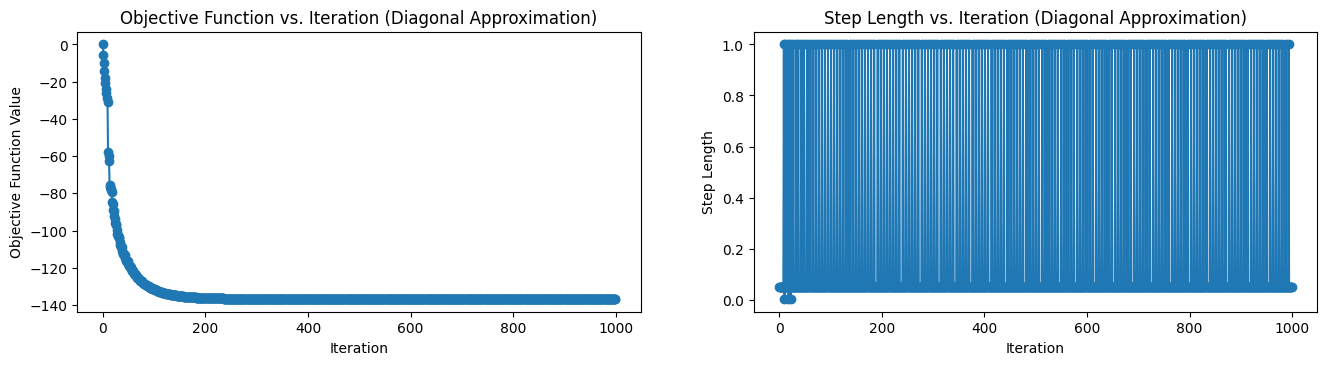

In [50]:
# Example usage:
np.random.seed(42)
# A = np.random.randn(m, n)

# Using diagonal approximation Newton method
solution_diag_approx, obj_values_diag_approx, step_lengths_diag_approx = diagonal_approximation_newton_method(A)

# Plotting
plt.figure(figsize=(16, 8))

# Objective Function vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(obj_values_diag_approx)
plt.scatter(range(len(obj_values_diag_approx)), obj_values_diag_approx, marker='o')
plt.title('Objective Function vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.subplot(2, 2, 2)
plt.plot(step_lengths_diag_approx)
plt.scatter(range(len(step_lengths_diag_approx)), step_lengths_diag_approx, marker='o')
plt.title('Step Length vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

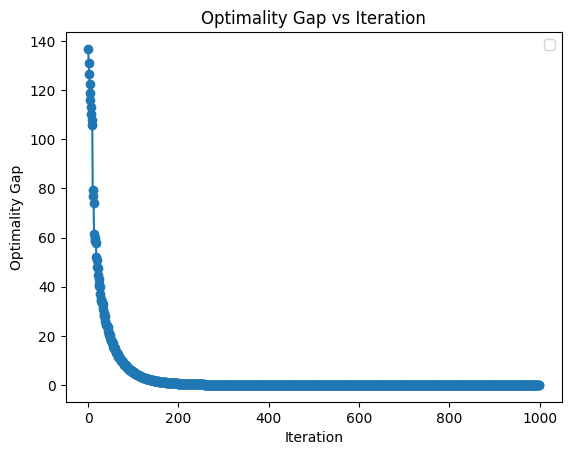

In [51]:
p_star_diag_approx = np.min(np.array(obj_values_diag_approx))
optimality_gaps_diag_approx = np.abs(obj_values_diag_approx - p_star_diag_approx)

plt.plot(optimality_gaps_diag_approx)
plt.scatter(range(len(optimality_gaps_diag_approx)), optimality_gaps_diag_approx, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.legend()

plt.show()

Experiment 2

In [52]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.5
BETA = 0.1

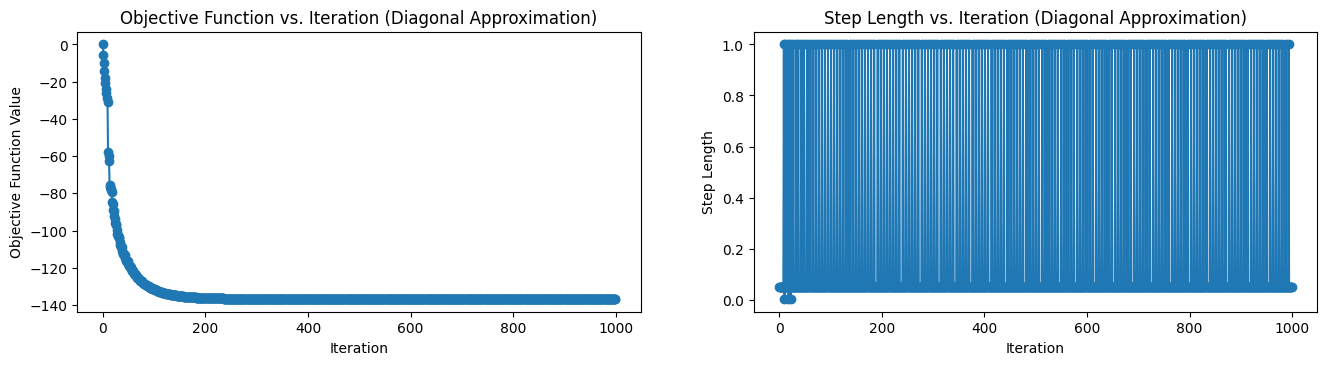

In [53]:
# Example usage:
np.random.seed(42)
# A = np.random.randn(m, n)

# Using diagonal approximation Newton method
solution_diag_approx, obj_values_diag_approx, step_lengths_diag_approx = diagonal_approximation_newton_method(A)

# Plotting
plt.figure(figsize=(16, 8))

# Objective Function vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(obj_values_diag_approx)
plt.scatter(range(len(obj_values_diag_approx)), obj_values_diag_approx, marker='o')
plt.title('Objective Function vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.subplot(2, 2, 2)
plt.plot(step_lengths_diag_approx)
plt.scatter(range(len(step_lengths_diag_approx)), step_lengths_diag_approx, marker='o')
plt.title('Step Length vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

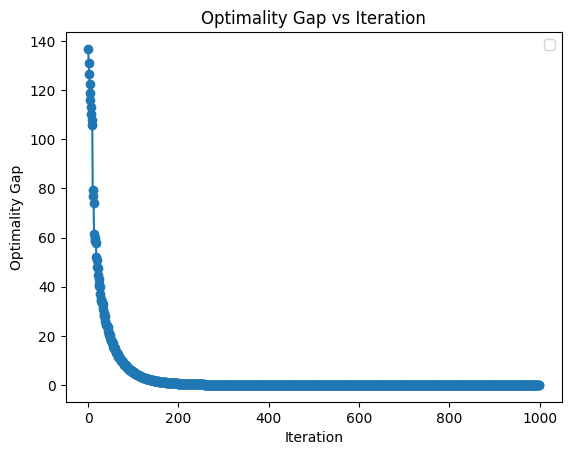

In [54]:
p_star_diag_approx = np.min(np.array(obj_values_diag_approx))
optimality_gaps_diag_approx = np.abs(obj_values_diag_approx - p_star_diag_approx)

plt.plot(optimality_gaps_diag_approx)
plt.scatter(range(len(optimality_gaps_diag_approx)), optimality_gaps_diag_approx, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.legend()

plt.show()

Experiment 3

In [55]:
m = 200
n = 100

np.random.seed(42)
A = np.random.randn(m, n)
x_gd = np.zeros(n)

# parameters
MAXITERS = 1000
GRADTOL = 1e-3
NTTOL = 1e-8

ALPHA = 0.2
BETA = 0.05

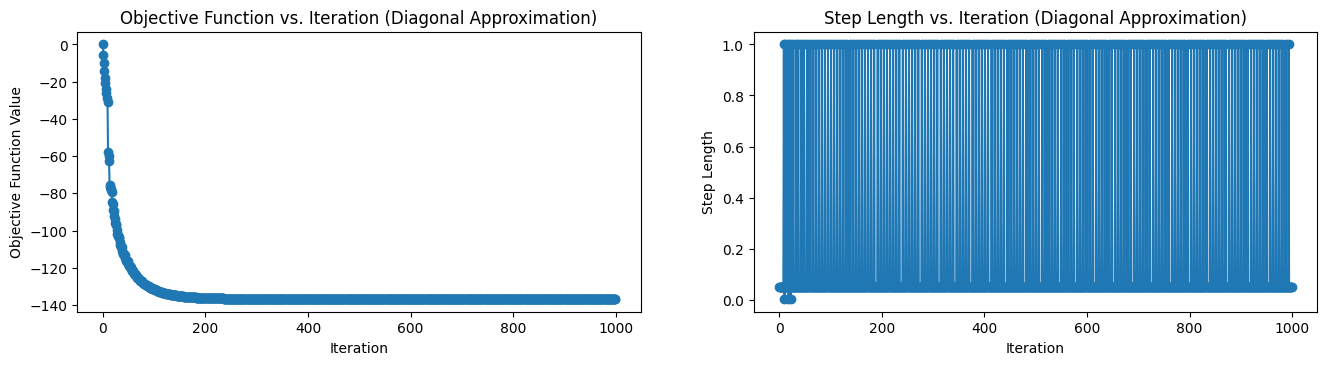

In [56]:
# Example usage:
np.random.seed(42)
# A = np.random.randn(m, n)

# Using diagonal approximation Newton method
solution_diag_approx, obj_values_diag_approx, step_lengths_diag_approx = diagonal_approximation_newton_method(A)

# Plotting
plt.figure(figsize=(16, 8))

# Objective Function vs. Iteration
plt.subplot(2, 2, 1)
plt.plot(obj_values_diag_approx)
plt.scatter(range(len(obj_values_diag_approx)), obj_values_diag_approx, marker='o')
plt.title('Objective Function vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.subplot(2, 2, 2)
plt.plot(step_lengths_diag_approx)
plt.scatter(range(len(step_lengths_diag_approx)), step_lengths_diag_approx, marker='o')
plt.title('Step Length vs. Iteration (Diagonal Approximation)')
plt.xlabel('Iteration')
plt.ylabel('Step Length')

plt.show();

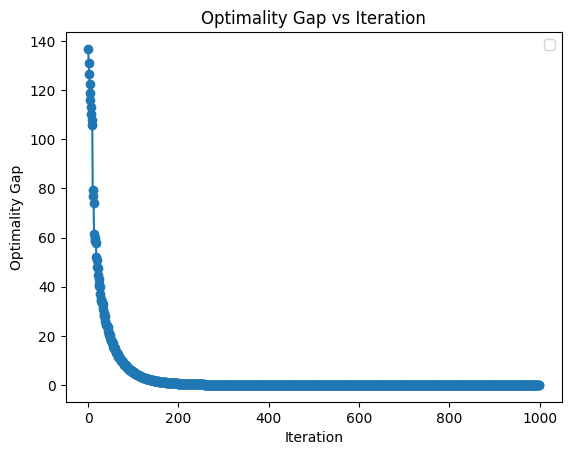

In [57]:
p_star_diag_approx = np.min(np.array(obj_values_diag_approx))
optimality_gaps_diag_approx = np.abs(obj_values_diag_approx - p_star_diag_approx)

plt.plot(optimality_gaps_diag_approx)
plt.scatter(range(len(optimality_gaps_diag_approx)), optimality_gaps_diag_approx, marker='o')
plt.title('Optimality Gap vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.legend()

plt.show()